# Das funktioniert mit latex übertragung und ist das gute"!!!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tabulate as tabulate
import matplotlib.colors as mcolors
from IPython.core.display import HTML
from tabulate import tabulate
from bs4 import BeautifulSoup
import requests
import re
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [23]:
###Definitionssachen
#WICHTIG: für sim pattern ist die reihenfolge so wie in assignment und hier im programm
#WICHTIG:  für proj pattern ist die reihenfolge die reihenfolge von era5 historical
scenario="ssp2_"
if scenario=="ssp2_":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6","MIROC-ES2L", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NESM3","NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp1_":
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "KACE-1-0-G", "MIROC6",
            "MIROC-ES2L", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM","NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp3_":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G","MIROC-ES2L", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0","NorESM2-LM", "UKESM1-0-LL"]
elif scenario=="hist":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G","MIROC-ES2L", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
else:
    print("wählen scenario aus")
aufgabe = "Projected patterns"#"Projected patterns"
def styling_specific_cell1(x,row_idx,col_idx):
    color = style_df_cl1.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell2(x,row_idx,col_idx):
    color = style_df_cl2.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell3(x,row_idx,col_idx):
    color = style_df_cl3.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell4(x,row_idx,col_idx):
    color = style_df_cl4.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell5(x,row_idx,col_idx):
    color = style_df_cl5.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def significance_decider(val,signi, minmax):
        if signi<minmax[4]:
            return 'background-color: darkblue; color: white'
        elif signi>minmax[5]:
            return 'background-color: darkred; color: white'
        elif signi>minmax[4] and signi<minmax[2]:
            return 'background-color: blue; color: white'
        elif signi>minmax[2] and signi<minmax[0]:
            return 'background-color: skyblue; color: black'
        elif signi<minmax[5] and signi>minmax[3]:
            return 'background-color: red; color: black'
        elif signi<minmax[3] and signi>minmax[1]:
            return 'background-color: orange; color: black'
        else:
            return 'background-color: white; color: black'
seas="mjjaso"
months=6
cluster = 5
months_name=[5,6,7,8,9,10]
month_len=[31,30,31,31,30,31]
months_official=["May","June","July","August","September","October"]
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
years_hist="1985-2014"
years_proj="1985-2014"
years_fut="2070-2099"
area="-90_90"
region="atl"
if region=="paz":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
else:
    scan={}
    atl={}
    naoplus={}
    naominus={}
    dipol={}

counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}

historisch_cl1={}
historisch_cl2={}
historisch_cl3={}
historisch_cl4={}
historisch_cl5={}

style_dict_cl1 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl1[column_name]= np.array([])
style_dict_cl1['all']=np.array([])

style_dict_cl2 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl2[column_name]= np.array([])
style_dict_cl2['all']=np.array([])

style_dict_cl3 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl3[column_name]= np.array([])
style_dict_cl3['all']=np.array([])

style_dict_cl4 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl4[column_name]= np.array([])
style_dict_cl4['all']=np.array([])

style_dict_cl5 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl5[column_name]= np.array([])
style_dict_cl5['all']=np.array([])


if aufgabe == "Simulated patterns":
    #model="ACCESS-CM2"
    for model in range(len(models)):
        path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
        datei_signi=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5cluster10PC_high_low.month.signif_bootstrap.txt"
        datei_minmax=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5cluster10PC_high_low.month.signif_bootstrap_minmaxwhiskers.txt"
        datei_assignment_hist=r"Assignment_"+region+"_historical"+years_hist+"_"+seas+".txt"
        datei_assignment_fut=r"Assignment_"+region+"_future"+scenario+years_fut+"_"+seas+".txt"
        assignment_hist=pd.read_csv("N:/atm_glomod/user/jomuel001/auswertung/TAYLOR/Cluster/"+datei_assignment_hist,delimiter="\t")
        assignment_fut=pd.read_csv("N:/atm_glomod/user/jomuel001/auswertung/TAYLOR/Cluster/"+datei_assignment_fut,delimiter="\t")
        #cluster werden zu era5 zugeordnet
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
        datei_occ_fut=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"

        significance=np.array(pd.read_csv(path+datei_signi, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_signi, delimiter=' ')))].reshape(months,5)
        minmaxwhiskers=np.array(pd.read_csv(path+datei_minmax, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_minmax, delimiter=' ')))].reshape(months,5,6)
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')
        occurence_fut['all']=np.loadtxt(path_2+datei_occ_fut, delimiter=' ')
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
        counts_fut['all']=np.bincount(np.round(occurence_fut['all'][:,3]).astype(int))/(days_per_period)

        for month in range(0,months):
            occurence_hist[str(months_official[month])]=np.array([])
            occurence_fut[str(months_official[month])]=np.array([])
            for entry in range(len(occurence_hist['all'])):
                if occurence_hist['all'][entry,1]==months_name[month]:
                    occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
                    occurence_fut[str(months_official[month])]=np.append(occurence_fut[str(months_official[month])],(occurence_fut['all'][entry,:]))
            occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
            occurence_fut[str(months_official[month])]= np.reshape(occurence_fut[str(months_official[month])], (int(len(occurence_fut[str(months_official[month])])/6),6))
            counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
            counts_fut[str(months_official[month])]=np.bincount(np.round(occurence_fut[str(months_official[month])][:,3]).astype(int))/(years*month_len[month]) #bei zweimodellen gibt es 120 0zuweisungen
            if counts_hist[str(months_official[month])][0]>0:
                print(models[model]+" da sind 120 falschzuweisungen")
        for month in range(0,months):
            if model==0:
                difference_cl1[str(months_official[month])]=np.array([])
                difference_cl2[str(months_official[month])]=np.array([])
                difference_cl3[str(months_official[month])]=np.array([])
                difference_cl4[str(months_official[month])]=np.array([])
                difference_cl5[str(months_official[month])]=np.array([])
            else:
                pass
            difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL1/SCAN'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL1/SCAN'][model]])
            difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL2/NAO+'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL2/NAO+'][model]])
            difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL3/NAO-'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL3/NAO-'][model]])
            difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL4/DIPOL'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL4/DIPOL'][model]])
            difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],counts_fut[str(months_official[month])][assignment_fut['CL5/ATL'][model]]-counts_hist[str(months_official[month])][assignment_hist['CL5/ATL'][model]])
        if model==0:
            difference_cl1['all']=np.array([])
            difference_cl2['all']=np.array([])
            difference_cl3['all']=np.array([])
            difference_cl4['all']=np.array([])
            difference_cl5['all']=np.array([])
            
            historisch_cl1['all']=np.array([])
            historisch_cl2['all']=np.array([])
            historisch_cl3['all']=np.array([])
            historisch_cl4['all']=np.array([])
            historisch_cl5['all']=np.array([])
        else:
            pass
        difference_cl1['all']=np.append(difference_cl1['all'],float(f"{counts_fut['all'][assignment_fut['CL1/SCAN'][model]]-counts_hist['all'][assignment_hist['CL1/SCAN'][model]]:.2f}"))
        difference_cl2['all']=np.append(difference_cl2['all'],float(f"{counts_fut['all'][assignment_fut['CL2/NAO+'][model]]-counts_hist['all'][assignment_hist['CL2/NAO+'][model]]:.2f}"))
        difference_cl3['all']=np.append(difference_cl3['all'],float(f"{counts_fut['all'][assignment_fut['CL3/NAO-'][model]]-counts_hist['all'][assignment_hist['CL3/NAO-'][model]]:.2f}"))
        difference_cl4['all']=np.append(difference_cl4['all'],float(f"{counts_fut['all'][assignment_fut['CL4/DIPOL'][model]]-counts_hist['all'][assignment_hist['CL4/DIPOL'][model]]:.2f}"))
        difference_cl5['all']=np.append(difference_cl5['all'],float(f"{counts_fut['all'][assignment_fut['CL5/ATL'][model]]-counts_hist['all'][assignment_hist['CL5/ATL'][model]]:.2f}"))
        
        
        #significance: spalten sind die cl, zeilen die monate, alles in 6x5 arrays
        #minmax: zuerst 5 cl dann nächster monat dann 5 cl dann nächster monat von cl1 nach cl5, alles in 6x5 arrays
        table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+1]).transpose()
        #break()
        #hier durchschnittbilden
        if model==len(models)-1:
            difference_cl1['all']=np.append(difference_cl1['all'], np.mean(difference_cl1['all']))
            difference_cl2['all']=np.append(difference_cl2['all'], np.mean(difference_cl2['all']))
            difference_cl3['all']=np.append(difference_cl3['all'], np.mean(difference_cl3['all']))
            difference_cl4['all']=np.append(difference_cl4['all'], np.mean(difference_cl4['all']))
            difference_cl5['all']=np.append(difference_cl5['all'], np.mean(difference_cl5['all']))                           
            for month in range(0,months):
                difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],np.mean(difference_cl1[str(months_official[month])]))
                difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],np.mean(difference_cl2[str(months_official[month])]))
                difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],np.mean(difference_cl3[str(months_official[month])]))
                difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],np.mean(difference_cl4[str(months_official[month])]))
                difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],np.mean(difference_cl5[str(months_official[month])]))
            models.append('add')
            table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+2]).transpose().round(2)  
            models=models[:-2]
            
            
            table_difference_cl1_styled=table_difference_cl1.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl2_styled=table_difference_cl2.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl3_styled=table_difference_cl3.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl4_styled=table_difference_cl4.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
            table_difference_cl5_styled=table_difference_cl5.style.background_gradient(axis=None, vmin=-0.2, vmax=0.2, cmap="seismic").format('{:.2f}')
        #durchschnitt bilden vorbeistyler.format('{:.2f}')
        #jetzt die farben
       #for month in range(0,months): 
        #    styled_df = df.style.applymap(lambda x: significance_decider(x, significance[month,]))
            print(table_difference_cl1_styled)
            print(table_difference_cl2_styled)
            print(table_difference_cl3_styled)
            print(table_difference_cl4_styled)
            print(table_difference_cl5_styled)
            # render the styled dataframe as HTML with CSS formatting
            table_difference_cl1_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl1.tex",convert_css=True)
            table_difference_cl2_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl2.tex",convert_css=True)
            table_difference_cl3_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl3.tex",convert_css=True)
            table_difference_cl4_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl4.tex",convert_css=True)
            table_difference_cl5_styled.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+region+"_sim_cl5.tex",convert_css=True)
            
                
#####################################################################################################################################################################################################################################                   
#####################################################################################################################################################################################################################################
#####################################################################################################################################################################################################################################                   
#####################################################################################################################################################################################################################################
#####################################################################################################################################################################################################################################                   
#####################################################################################################################################################################################################################################

elif aufgabe == 'Projected patterns':
    for model in range(len(models)):
        path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
        datei_signi=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5cluster10PC_high_low.month.signif_bootstrap.txt"
        datei_minmax=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5cluster10PC_high_low.month.signif_bootstrap_minmaxwhiskers.txt"
        #cluster werden zu era5 zugeordnet
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates"
        datei_occ_fut=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates"
        significance=np.array(pd.read_csv(path+datei_signi, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_signi, delimiter=' ')))].reshape(months,cluster)
        minmaxwhiskers=np.array(pd.read_csv(path+datei_minmax, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_minmax, delimiter=' ')))].reshape(months,cluster,6)
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')
        occurence_fut['all']=np.loadtxt(path_2+datei_occ_fut, delimiter=' ')
       # print(occurence_hist['all'])
       # print(occurence_fut['all'])
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
        counts_fut['all']=np.bincount(np.round(occurence_fut['all'][:,3]).astype(int))/(days_per_period)
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        print(model)
        for month in range(0,months):
            occurence_hist[str(months_official[month])]=np.array([])
            occurence_fut[str(months_official[month])]=np.array([])
            for entry in range(len(occurence_hist['all'])):
                if occurence_hist['all'][entry,1]==months_name[month]:
                    occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
                    occurence_fut[str(months_official[month])]=np.append(occurence_fut[str(months_official[month])],(occurence_fut['all'][entry,:]))
            occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
            occurence_fut[str(months_official[month])]= np.reshape(occurence_fut[str(months_official[month])], (int(len(occurence_fut[str(months_official[month])])/6),6))
            #print(occurence_hist['May'])
            #print(occurence_fut['May'])
            counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
            counts_fut[str(months_official[month])]=np.bincount(np.round(occurence_fut[str(months_official[month])][:,3]).astype(int))/(years*month_len[month]) #bei zweimodellen gibt es 120 0zuweisungen
            #print(years*month_len[month])
            #print(counts_hist['May'])
            #print(counts_fut['May'])
            if counts_hist[str(months_official[month])][0]>0:
                print(models[model]+" da sind 120 falschzuweisungen")
        for month in range(0,months):
            if model==0:
                difference_cl1[str(months_official[month])]=np.array([])
                difference_cl2[str(months_official[month])]=np.array([])
                difference_cl3[str(months_official[month])]=np.array([])
                difference_cl4[str(months_official[month])]=np.array([])
                difference_cl5[str(months_official[month])]=np.array([])
            else:
                pass
            difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],counts_fut[str(months_official[month])][1]*100-counts_hist[str(months_official[month])][1]*100)
            difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],counts_fut[str(months_official[month])][2]*100-counts_hist[str(months_official[month])][2]*100)
            difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],counts_fut[str(months_official[month])][3]*100-counts_hist[str(months_official[month])][3]*100)
            difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],counts_fut[str(months_official[month])][4]*100-counts_hist[str(months_official[month])][4]*100)
            difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],counts_fut[str(months_official[month])][5]*100-counts_hist[str(months_official[month])][5]*100)
        if model==0:
            difference_cl1['all']=np.array([])
            difference_cl2['all']=np.array([])
            difference_cl3['all']=np.array([])
            difference_cl4['all']=np.array([])
            difference_cl5['all']=np.array([])
            
            historisch_cl1['all']=np.array([])
            historisch_cl2['all']=np.array([])
            historisch_cl3['all']=np.array([])
            historisch_cl4['all']=np.array([])
            historisch_cl5['all']=np.array([])
        else:
            pass
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        #print(counts_hist['June'])
        #print(counts_fut['June'])
        difference_cl1['all']=np.append(difference_cl1['all'],float(f"{counts_fut['all'][1]-counts_hist['all'][1]:.3f}")*100)
        #print(difference_cl1['all'])
        difference_cl2['all']=np.append(difference_cl2['all'],float(f"{counts_fut['all'][2]-counts_hist['all'][2]:.3f}")*100)
        difference_cl3['all']=np.append(difference_cl3['all'],float(f"{counts_fut['all'][3]-counts_hist['all'][3]:.3f}")*100)
        difference_cl4['all']=np.append(difference_cl4['all'],float(f"{counts_fut['all'][4]-counts_hist['all'][4]:.3f}")*100)
        difference_cl5['all']=np.append(difference_cl5['all'],float(f"{counts_fut['all'][5]-counts_hist['all'][5]:.3f}")*100)
        
        historisch_cl1['all']=np.append(historisch_cl1['all'],float(f"{counts_hist['all'][1]:.3f}")*100)
        historisch_cl2['all']=np.append(historisch_cl2['all'],float(f"{counts_hist['all'][2]:.3f}")*100)
        historisch_cl3['all']=np.append(historisch_cl3['all'],float(f"{counts_hist['all'][3]:.3f}")*100)
        historisch_cl4['all']=np.append(historisch_cl4['all'],float(f"{counts_hist['all'][4]:.3f}")*100)
        historisch_cl5['all']=np.append(historisch_cl5['all'],float(f"{counts_hist['all'][5]:.3f}")*100)
        #significance: spalten sind die cl, zeilen die monate, alles in 6x5 arrays
        #minmax: zuerst 5 cl dann nächster monat dann 5 cl dann nächster monat von cl1 nach cl5, alles in 6x5 arrays
        table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+1]).transpose()
                                        
        table_historisch_cl1 = pd.DataFrame.from_dict(historisch_cl1, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl2 = pd.DataFrame.from_dict(historisch_cl2, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl3 = pd.DataFrame.from_dict(historisch_cl3, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl4 = pd.DataFrame.from_dict(historisch_cl4, orient='index', columns=models[:model+1]).transpose()
        table_historisch_cl5 = pd.DataFrame.from_dict(historisch_cl5, orient='index', columns=models[:model+1]).transpose()
        #hier durchschnittbilden
        for month in range(0,months):
            column_name=str(months_official[month])
            row_index=model
            style_dict_cl1[column_name] = np.append(style_dict_cl1[column_name], significance_decider(table_difference_cl1[column_name][row_index], significance[month,1-1], minmaxwhiskers[month][1-1]))
            style_dict_cl2[column_name] = np.append(style_dict_cl2[column_name], significance_decider(table_difference_cl2[column_name][row_index], significance[month,2-1], minmaxwhiskers[month][2-1]))
            style_dict_cl3[column_name] = np.append(style_dict_cl3[column_name], significance_decider(table_difference_cl3[column_name][row_index], significance[month,3-1], minmaxwhiskers[month][3-1]))
            style_dict_cl4[column_name] = np.append(style_dict_cl4[column_name], significance_decider(table_difference_cl4[column_name][row_index], significance[month,4-1], minmaxwhiskers[month][4-1]))
            style_dict_cl5[column_name] = np.append(style_dict_cl5[column_name], significance_decider(table_difference_cl5[column_name][row_index], significance[month,5-1], minmaxwhiskers[month][5-1]))
            #print(style_dict)
        style_dict_cl1['all']=np.append(style_dict_cl1['all'], significance_decider(table_difference_cl1[column_name][row_index], 0, minmaxwhiskers[month][1-1]))
        style_dict_cl2['all']=np.append(style_dict_cl2['all'], significance_decider(table_difference_cl2[column_name][row_index], 0, minmaxwhiskers[month][2-1]))
        style_dict_cl3['all']=np.append(style_dict_cl3['all'], significance_decider(table_difference_cl3[column_name][row_index], 0, minmaxwhiskers[month][3-1]))
        style_dict_cl4['all']=np.append(style_dict_cl4['all'], significance_decider(table_difference_cl4[column_name][row_index], 0, minmaxwhiskers[month][4-1]))
        style_dict_cl5['all']=np.append(style_dict_cl5['all'], significance_decider(table_difference_cl5[column_name][row_index], 0, minmaxwhiskers[month][5-1]))
            #table_difference_cl1_styled=table_difference_cl1.style.applymap(lambda val: significance_decider(val, significance[month,1-1], minmaxwhiskers[month][1-1]) if (val == table_difference_cl1[column_name][row_index]) else '')
        if model==len(models)-1:
            difference_cl1['all']=np.append(difference_cl1['all'], np.mean(difference_cl1['all']))
            difference_cl2['all']=np.append(difference_cl2['all'], np.mean(difference_cl2['all']))
            difference_cl3['all']=np.append(difference_cl3['all'], np.mean(difference_cl3['all']))
            difference_cl4['all']=np.append(difference_cl4['all'], np.mean(difference_cl4['all']))
         #   difference_cl5['all']=np.append(difference_cl5['all'], np.mean(difference_cl5['all']))                           
            for month in range(0,months):
                difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],np.mean(difference_cl1[str(months_official[month])]))
                difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],np.mean(difference_cl2[str(months_official[month])]))
                difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],np.mean(difference_cl3[str(months_official[month])]))
                difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],np.mean(difference_cl4[str(months_official[month])]))
                difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],np.mean(difference_cl5[str(months_official[month])]))
            models.append('add')
            table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+2]).transpose().round(3)
            table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+2]).transpose().round(3)  
            for month in range(0,months):
                column_name=str(months_official[month])
                row_index=model+1
                style_dict_cl1[column_name] = np.append(style_dict_cl1[column_name], significance_decider(table_difference_cl1[column_name][row_index], 0, minmaxwhiskers[month][1-1]))
                style_dict_cl2[column_name] = np.append(style_dict_cl2[column_name], significance_decider(table_difference_cl2[column_name][row_index], 0, minmaxwhiskers[month][2-1]))
                style_dict_cl3[column_name] = np.append(style_dict_cl3[column_name], significance_decider(table_difference_cl3[column_name][row_index], 0, minmaxwhiskers[month][3-1]))
                style_dict_cl4[column_name] = np.append(style_dict_cl4[column_name], significance_decider(table_difference_cl4[column_name][row_index], 0, minmaxwhiskers[month][4-1]))
                style_dict_cl5[column_name] = np.append(style_dict_cl5[column_name], significance_decider(table_difference_cl5[column_name][row_index], 0, minmaxwhiskers[month][5-1]))
            #print(style_dict)
            style_dict_cl1['all']=np.append(style_dict_cl1['all'], significance_decider(table_difference_cl1[column_name][row_index], 0, minmaxwhiskers[month][1-1]))
            style_dict_cl2['all']=np.append(style_dict_cl2['all'], significance_decider(table_difference_cl2[column_name][row_index], 0, minmaxwhiskers[month][2-1]))
            style_dict_cl3['all']=np.append(style_dict_cl3['all'], significance_decider(table_difference_cl3[column_name][row_index], 0, minmaxwhiskers[month][3-1]))
            style_dict_cl4['all']=np.append(style_dict_cl4['all'], significance_decider(table_difference_cl4[column_name][row_index], 0, minmaxwhiskers[month][4-1]))
            style_dict_cl5['all']=np.append(style_dict_cl5['all'], significance_decider(table_difference_cl5[column_name][row_index], 0, minmaxwhiskers[month][5-1]))
            models=models[:-2]
            
            table_difference_cl1_styled=table_difference_cl1.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl2_styled=table_difference_cl2.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl3_styled=table_difference_cl3.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl4_styled=table_difference_cl4.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
            table_difference_cl5_styled=table_difference_cl5.style.background_gradient(axis=None, vmin=-20.0, vmax=20.0, cmap="seismic").format('{:.1f}')
        #durchschnitt bilden vorbeistyler.format('{:.2f}')
        #jetzt die farben
       #for month in range(0,months): 
        #    styled_df = df.style.applymap(lambda x: significance_decider(x, significance[month,]))

            # render the styled dataframe as HTML with CSS formatting

            
    display(table_difference_cl1_styled)
    display(table_difference_cl2_styled)
    display(table_difference_cl3_styled)
    display(table_difference_cl4_styled)
    display(table_difference_cl5_styled)
    


            


0
1
2
3
4
5
6
7
8
HadGEM3-GC31-LL da sind 120 falschzuweisungen
HadGEM3-GC31-LL da sind 120 falschzuweisungen
HadGEM3-GC31-LL da sind 120 falschzuweisungen
HadGEM3-GC31-LL da sind 120 falschzuweisungen
9
10
11
12
13
14
15
16
17
18
19
20
21
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen


,May,June,July,August,September,October,all
ACCESS-CM2,-6.6,-2.8,-9.2,-11.5,-8.1,-5.4,-7.3
ACCESS-ESM1,-5.4,-4.3,3.0,-8.8,-6.3,0.9,-3.5
CESM2-WACCM,-9.0,3.1,5.8,-0.1,0.6,1.1,0.2
CNRM-CM6-1,0.9,-15.0,-10.9,-2.8,-2.2,-2.3,-5.3
CNRM-CM6-1-HR,-2.0,-3.1,-14.3,-10.5,-3.6,3.3,-5.1
CNRM-ESM2-1,-3.7,-0.1,-7.0,1.2,-0.9,-2.8,-2.2
GFDL-CM4,-5.7,-10.8,-8.3,-8.1,-2.6,-8.8,-7.4
GFDL-ESM4,-1.8,-10.4,-5.5,6.7,-3.8,-9.1,-4.0
HadGEM3-GC31-LL,-8.8,-4.2,-5.1,-7.1,-8.3,-7.5,-6.8
INM-CM4-8,-7.4,-2.2,-7.1,-12.9,-7.6,-5.9,-7.2


,May,June,July,August,September,October,all
ACCESS-CM2,3.7,6.3,14.6,19.9,7.1,3.5,9.2
ACCESS-ESM1,2.0,1.1,-1.6,-1.4,9.0,7.7,2.8
CESM2-WACCM,5.9,-16.4,-3.7,-5.9,-0.3,-0.5,-3.4
CNRM-CM6-1,6.1,-2.6,6.6,1.9,2.9,-1.1,2.3
CNRM-CM6-1-HR,-1.7,3.8,13.9,2.9,8.3,2.6,4.9
CNRM-ESM2-1,5.1,2.7,3.7,4.0,-2.7,4.2,2.8
GFDL-CM4,7.8,1.1,-1.7,9.0,2.8,12.7,5.3
GFDL-ESM4,-4.6,-1.6,-2.0,-4.3,-0.3,7.8,-0.8
HadGEM3-GC31-LL,-0.6,1.8,-0.3,-1.7,2.4,1.3,0.5
INM-CM4-8,6.1,3.6,8.7,8.1,7.9,2.9,6.2


,May,June,July,August,September,October,all
ACCESS-CM2,-3.8,-7.6,-3.1,-1.7,3.8,2.9,-1.6
ACCESS-ESM1,3.4,-3.9,0.4,-1.9,-3.0,-2.3,-1.2
CESM2-WACCM,3.9,0.1,-4.4,0.3,5.9,1.7,1.2
CNRM-CM6-1,-0.9,8.8,5.9,9.4,4.9,3.2,5.2
CNRM-CM6-1-HR,-4.4,1.3,-1.8,8.4,2.9,4.6,1.8
CNRM-ESM2-1,5.4,-3.3,-2.8,-4.1,-0.3,5.5,0.1
GFDL-CM4,-2.8,2.6,-1.3,-2.8,-7.1,-8.1,-3.3
GFDL-ESM4,-5.2,1.4,10.1,-5.8,1.9,5.3,1.3
HadGEM3-GC31-LL,2.9,3.0,2.6,8.5,0.6,5.5,3.9
INM-CM4-8,-5.7,-6.9,-3.7,-2.4,3.3,-1.6,-2.8


,May,June,July,August,September,October,all
ACCESS-CM2,4.0,0.0,-5.7,-7.3,-5.7,-7.0,-3.6
ACCESS-ESM1,-2.2,8.2,0.0,0.0,-0.3,-6.0,-0.1
CESM2-WACCM,-9.8,13.7,-1.9,0.0,-1.1,-2.0,-0.3
CNRM-CM6-1,-11.6,1.1,-9.8,-11.7,-8.9,-9.7,-8.5
CNRM-CM6-1-HR,7.3,-2.6,1.1,-1.3,-7.8,-7.7,-1.8
CNRM-ESM2-1,-4.9,2.0,1.3,-5.3,0.1,-4.9,-2.0
GFDL-CM4,-0.4,-0.2,8.2,1.3,0.2,-3.3,1.0
GFDL-ESM4,4.4,-0.8,-6.7,0.5,-4.3,-11.0,-3.0
HadGEM3-GC31-LL,-3.2,-4.0,-9.8,-9.7,-3.4,-6.1,-6.1
INM-CM4-8,3.8,-1.2,-1.7,-9.6,-8.8,1.6,-2.6


,May,June,July,August,September,October,all
ACCESS-CM2,2.7,4.0,3.4,0.6,2.9,5.9,3.3
ACCESS-ESM1,2.0,-1.1,-1.8,12.2,0.7,-0.3,2.0
CESM2-WACCM,9.0,-0.4,4.2,5.7,-5.0,-0.2,2.3
CNRM-CM6-1,5.5,7.7,8.2,3.2,3.3,9.8,6.3
CNRM-CM6-1-HR,0.9,0.6,1.2,0.5,0.1,-2.8,0.1
CNRM-ESM2-1,-1.8,-1.2,4.8,4.2,3.8,-1.9,1.3
GFDL-CM4,1.1,7.3,3.1,0.5,6.7,7.5,4.3
GFDL-ESM4,7.2,11.3,4.1,2.9,6.6,7.0,6.5
HadGEM3-GC31-LL,9.8,3.4,12.6,10.0,8.8,6.9,8.6
INM-CM4-8,3.2,6.8,3.8,16.8,5.1,3.0,6.4


In [15]:

style_df_cl1 = pd.DataFrame.from_dict(style_dict_cl1, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl2 = pd.DataFrame.from_dict(style_dict_cl2, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl3 = pd.DataFrame.from_dict(style_dict_cl3, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl4 = pd.DataFrame.from_dict(style_dict_cl4, orient='index', columns=models+['all']).transpose().round(3)
style_df_cl5 = pd.DataFrame.from_dict(style_dict_cl5, orient='index', columns=models+['all']).transpose().round(3)
table_difference_cl1_styled_signi = table_difference_cl1.style.set_caption("Clusterpattern 1")
table_difference_cl2_styled_signi = table_difference_cl2.style.set_caption("Clusterpattern 2")
table_difference_cl3_styled_signi = table_difference_cl3.style.set_caption("Clusterpattern 3")
table_difference_cl4_styled_signi = table_difference_cl4.style.set_caption("Clusterpattern 4")
table_difference_cl5_styled_signi = table_difference_cl5.style.set_caption("Clusterpattern 5")
for idx_r in range(0,19):
    for idx_c in range(0,6):
        table_difference_cl1_styled_signi.apply(styling_specific_cell1, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl2_styled_signi.apply(styling_specific_cell2, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl3_styled_signi.apply(styling_specific_cell3, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl4_styled_signi.apply(styling_specific_cell4, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
        table_difference_cl5_styled_signi.apply(styling_specific_cell5, row_idx = idx_r, col_idx = idx_c, axis = None).format('{:.1f}')
display(table_difference_cl1_styled_signi)
display(table_difference_cl2_styled_signi)
display(table_difference_cl3_styled_signi)
display(table_difference_cl4_styled_signi)
display(table_difference_cl5_styled_signi)
table_difference_cl1_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl1.tex",convert_css=True)
table_difference_cl2_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl2.tex",convert_css=True)
table_difference_cl3_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl3.tex",convert_css=True)
table_difference_cl4_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl4.tex",convert_css=True)
table_difference_cl5_styled_signi.to_latex("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/occurence_change_"+scenario+region+seas+"_proj_cl5.tex",convert_css=True)

ValueError: 19 columns passed, passed data had 23 columns

In [21]:
datei=np.loadtxt(r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA.90_270_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates",delimiter=' ')
counting=np.bincount(np.round(datei[:,3]).astype(int))/(5520)
print(counting)

[0.         0.22626812 0.21865942 0.18985507 0.18931159 0.1759058 ]


[0, 1, 2, 3, 4]


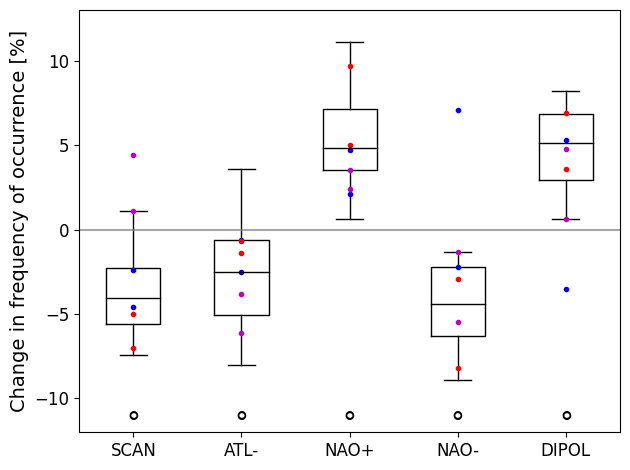

In [21]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(hist_scan-np.mean(hist_scan),np.array(table_difference_cl1['all'][:-1]), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(hist_atl-np.mean(hist_atl),np.array(table_difference_cl2['all'][:-1]), equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(hist_naoplus-np.mean(hist_naoplus),np.array(table_difference_cl3['all'][:-1]), equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),np.array(table_difference_cl4['all'][:-1]), equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(hist_dipol-np.mean(hist_dipol),np.array(table_difference_cl5['all'][:-1]), equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
    
scenario="ssp5_"  
bp=plt.boxplot(x=[np.array(table_difference_cl1['all'][:-1]),np.array(table_difference_cl2['all'][:-1]),np.array(table_difference_cl3['all'][:-1]),np.array(table_difference_cl4['all'][:-1]),np.array(table_difference_cl5['all'][:-1])], labels=["SCAN","ATL-","NAO+","NAO-","DIPOL"], showfliers=False,medianprops=dict(color="k"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)

#plt.


try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()


plt.plot(1.,-4.6,"b.")
plt.plot(1,-2.4,"b.")
plt.plot(1,-7,"r.")
plt.plot(1,-5,"r.")
plt.plot(1,4.4,"m.")
plt.plot(1,1.1,"m.")

plt.plot(2.,-0.6,"b.")
plt.plot(2,-2.5,"b.")
plt.plot(2,-1.4,"r.")
plt.plot(2,-0.7,"r.")
plt.plot(2,-6.1,"m.")
plt.plot(2,-3.8,"m.")

plt.plot(3.,2.1,"b.")
plt.plot(3,4.7,"b.")
plt.plot(3,9.7,"r.")
plt.plot(3,5.0,"r.")
plt.plot(3,2.4,"m.")
plt.plot(3,3.5,"m.")


plt.plot(4.,-2.2,"b.")
plt.plot(4,7.1,"b.")
plt.plot(4,-8.2,"r.")
plt.plot(4,-2.9,"r.")
plt.plot(4,-1.3,"m.")
plt.plot(4,-5.5,"m.")


plt.plot(5.,5.3,"b.")
plt.plot(5,-3.5,"b.")
plt.plot(5,6.9,"r.")
plt.plot(5,3.6,"r.")
plt.plot(5,0.6,"m.")
plt.plot(5,4.8,"m.")

plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/ssp1_PolarRES_whiskerplot_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

# historical data for welchs t test

In [3]:
hist_scan=np.array(table_historisch_cl1['all'][:-1])
hist_atl=np.array(table_historisch_cl2['all'][:-1])
hist_naoplus=np.array(table_historisch_cl3['all'][:-1])
hist_naominus=np.array(table_historisch_cl4['all'][:-1])
hist_dipol=np.array(table_historisch_cl5['all'][:-1])

In [3]:
ssp5_scan=np.array(table_difference_cl1['all'][:-1])
ssp5_atl=np.array(table_difference_cl2['all'][:-1])
ssp5_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp5_naominus=np.array(table_difference_cl4['all'][:-1])
ssp5_dipol=np.array(table_difference_cl5['all'][:-1])

In [10]:
ssp3_scan=np.array(table_difference_cl1['all'][:-1])
ssp3_atl=np.array(table_difference_cl2['all'][:-1])
ssp3_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp3_naominus=np.array(table_difference_cl4['all'][:-1])
ssp3_dipol=np.array(table_difference_cl5['all'][:-1])

In [8]:
ssp2_scan=np.array(table_difference_cl1['all'][:-1])
ssp2_atl=np.array(table_difference_cl2['all'][:-1])
ssp2_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp2_naominus=np.array(table_difference_cl4['all'][:-1])
ssp2_dipol=np.array(table_difference_cl5['all'][:-1])

In [6]:
ssp1_scan=np.array(table_difference_cl1['all'][:-1])
ssp1_atl=np.array(table_difference_cl2['all'][:-1])
ssp1_naoplus=np.array(table_difference_cl3['all'][:-1])
ssp1_naominus=np.array(table_difference_cl4['all'][:-1])
ssp1_dipol=np.array(table_difference_cl5['all'][:-1])

In [11]:
if scenario=="ssp2_":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6","MIROC-ES2L", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NESM3","NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
    
elif scenario=="":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G", "MIROC6", "MIROC-ES2L", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp1_":
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "KACE-1-0-G", "MIROC6",
            "MIROC-ES2L", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NESM3", "NorESM2-LM","NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp3_":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G","MIROC-ES2L", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0","NorESM2-LM", "UKESM1-0-LL"]
elif scenario=="hist":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR","KACE-1-0-G","MIROC-ES2L", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0","NESM3", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]

[4]


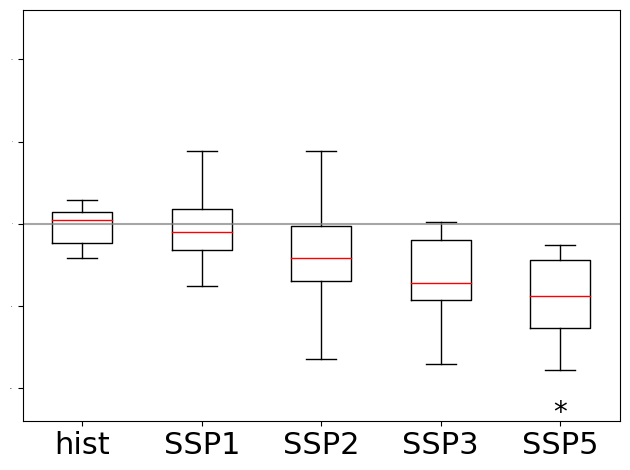

In [13]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),hist_naominus-np.mean(hist_naominus), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp1_naominus, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp2_naominus, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp3_naominus, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(hist_naominus-np.mean(hist_naominus),ssp5_naominus, equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)

scenario="Vergleich"  
bp=plt.boxplot(x=[hist_naominus-np.mean(hist_naominus)-0.1,ssp1_naominus,ssp2_naominus,ssp3_naominus,ssp5_naominus], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))

plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=22)
plt.yticks(fontsize=0)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "*", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/naominus_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

[1, 2, 3, 4]


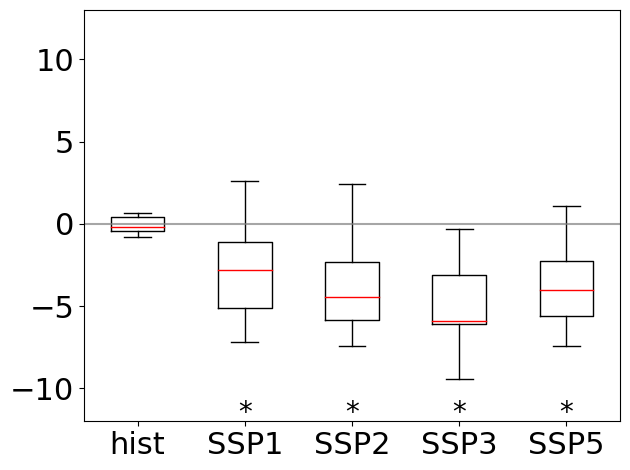

[4]


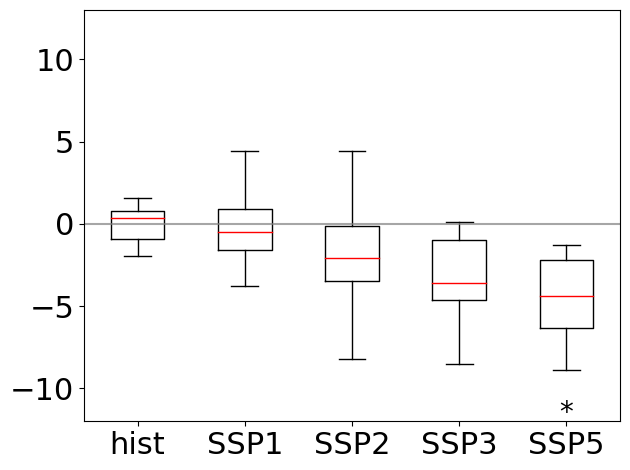

[3, 4]


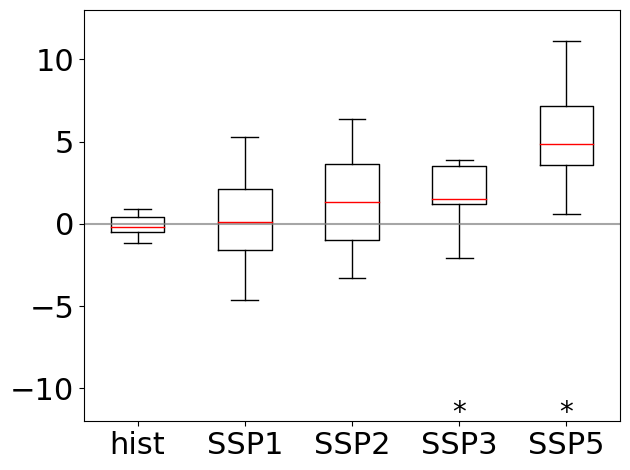

[4]


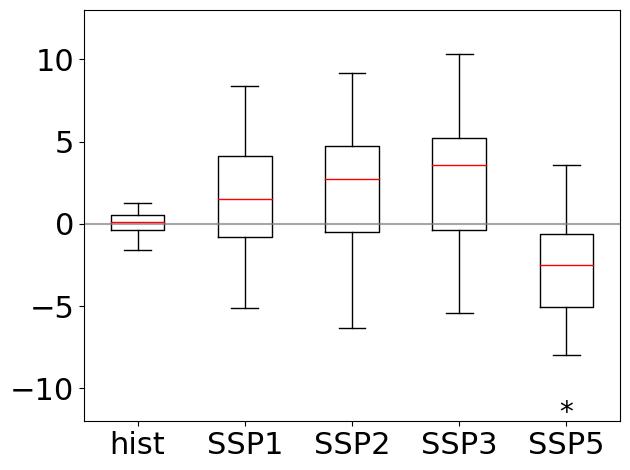

[1, 2, 3, 4]


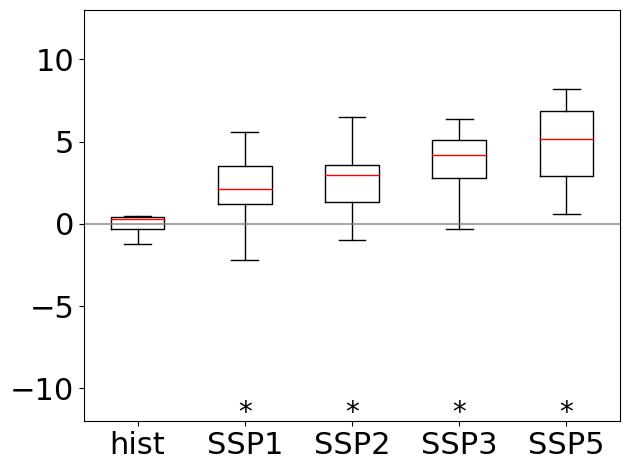

In [17]:
import scipy.stats as stats

# Define lists of variable affixes
affixes = ["scan","naominus", "naoplus", "atl","dipol"]

# Create an empty list to store p-values
p_values = []

# Loop through the variable and affix combinations and perform t-tests
for affix in affixes:
        # Assuming you have these variables defined somewhere
        variable_name_ = f"hist_{affix}"
        variable1_name_ = f"ssp1_{affix}"
        variable2_name_ = f"ssp2_{affix}"
        variable3_name_ = f"ssp3_{affix}"
        variable5_name_ = f"ssp5_{affix}"
        variable_name = globals()[variable_name_]
        variable1_name = globals()[variable1_name_]
        variable2_name = globals()[variable2_name_]
        variable3_name = globals()[variable3_name_]
        variable5_name = globals()[variable5_name_]
        
        t_stat, p_value_1 = stats.ttest_ind(variable_name-np.mean(variable_name),variable_name-variable_name, equal_var=False)
        t_stat, p_value_2 = stats.ttest_ind(variable_name-np.mean(variable_name),variable1_name, equal_var=False)
        t_stat, p_value_3 = stats.ttest_ind(variable_name-np.mean(variable_name),variable2_name, equal_var=False)
        t_stat, p_value_4 = stats.ttest_ind(variable_name-np.mean(variable_name),variable3_name, equal_var=False)
        t_stat, p_value_5 = stats.ttest_ind(variable_name-np.mean(variable_name),variable5_name, equal_var=False)
        values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
        threshold=0.01
        smaller_indices = [index for index, value in enumerate(values) if value < threshold]
        print(smaller_indices)

        scenario="Vergleich"  
        bp=plt.boxplot(x=[variable_name-np.mean(variable_name),variable1_name,variable2_name,variable3_name,variable5_name], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))

        plt.hlines(0,0,6,color='grey', alpha=0.7)
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.xlim(0.5,5.5)
        plt.ylim(-12,13)
        try:
            plt.text(smaller_indices[0]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[1]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[2]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[3]+1, -11.5, "*", ha='center', va='center', fontsize=20)
        except:
            pass
        try:
            plt.text(smaller_indices[4]+1, -11.5, "*", ha='center', va='center', fontsize=20)#
        except:
            pass
        plt.tight_layout()
        plt.savefig(f"N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/{affix}_POLARRES_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)
        plt.show()

In [24]:
variable_name

'hist_scan'

In [6]:
scenario=""

if scenario=="ssp2_":
    sce_model="MULTIMODEL-SSP2"
    #scan 1, atl 2, n+ 3, n- 4 dip 5 #hier reihenfolge von ERA5 hist im moment wegen projected patterns
    zuordnungcluster=[0,1,5,2,4,3]
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
elif scenario=="":
    sce_model="MULTIMODEL-SSP5"
    zuordnungcluster=[0,1,2,5,4,3]
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
elif scenario=="ssp1_":
    sce_model="MULTIMODEL-SSP1"
    zuordnungcluster=[0,1,2,5,4,3]
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
elif scenario=="ssp3_":
    sce_model="MULTIMODEL-SSP3"
    zuordnungcluster=[0,1,2,5,4,3]
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0", "UKESM1-0-LL"]
    dates=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
else:
    print("wählen scenario aus")
sce_model_hist="MULTIMODEL-hist"
zuordnungcluster_hist=[0,1,2,5,4,3]
models_hist =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
dates_hist=[5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520,5520]
seas="mjjaso"
months=6
cluster = 5
months_name=[5,6,7,8,9,10]
month_len=[31,30,31,31,30,31]
months_official=["May","June","July","August","September","October"]
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
years_hist="1985-2014"
years_proj="1985-2014"
years_fut="2070-2099"
area="-90_90"
region="atl"
if region=="paz":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
else:
    scan={}
    atl={}
    naoplus={}
    naominus={}
    dipol={}
counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}

for model in range(len(models)):
        model_hist=model
        path_fut="N:/atm_glomod/user/jomuel001/CMIP6_models/"+sce_model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+"MULTIMODEL-hist"+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
        #cluster werden zu era5 zugeordnet
        datei_occ_hist=r"KMEANSslp_hpa_"+""+"MULTIMODEL-hist"+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
        datei_occ_fut=r"KMEANSslp_hpa_"+scenario+sce_model+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
        print(datei_occ_fut)
        while models[model] != models_hist[model_hist]:
            model_hist=model_hist+1
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')[sum(dates_hist[:model_hist]):sum(dates_hist[:(model_hist+1)]),:]
        occurence_fut['all']=np.loadtxt(path_fut+datei_occ_fut, delimiter=' ')[sum(dates[:model]):sum(dates[:(model+1)]),:]

        for i in range(len(occurence_fut['all'][:,3])):
            if occurence_fut['all'][i,3] == 1:
                occurence_fut['all'][i,3] = zuordnungcluster[1]
            elif occurence_fut['all'][i,3] == 2:
                occurence_fut['all'][i,3] = zuordnungcluster[2]
            elif occurence_fut['all'][i,3] == 3:
                occurence_fut['all'][i,3] = zuordnungcluster[3]
            elif occurence_fut['all'][i,3] == 4:
                occurence_fut['all'][i,3] = zuordnungcluster[4]
            elif occurence_fut['all'][i,3] == 5:
                occurence_fut['all'][i,3] = zuordnungcluster[5]
                
        for i in range(len(occurence_hist['all'][:,3])):
            if occurence_hist['all'][i,3] == 1:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[1]
            elif occurence_hist['all'][i,3] == 2:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[2]
            elif occurence_hist['all'][i,3] == 3:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[3]
            elif occurence_hist['all'][i,3] == 4:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[4]
            elif occurence_hist['all'][i,3] == 5:
                occurence_hist['all'][i,3] = zuordnungcluster_hist[5]
       # print(occurence_hist['all'])
       # print(occurence_fut['all'])
        counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)
        counts_fut['all']=np.bincount(np.round(occurence_fut['all'][:,3]).astype(int))/(days_per_period)
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        print(model)
        for month in range(0,months):
            occurence_hist[str(months_official[month])]=np.array([])
            occurence_fut[str(months_official[month])]=np.array([])
            for entry in range(len(occurence_hist['all'])):
                if occurence_hist['all'][entry,1]==months_name[month]:
                    occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
                    occurence_fut[str(months_official[month])]=np.append(occurence_fut[str(months_official[month])],(occurence_fut['all'][entry,:]))
            occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
            occurence_fut[str(months_official[month])]= np.reshape(occurence_fut[str(months_official[month])], (int(len(occurence_fut[str(months_official[month])])/6),6))
            #print(occurence_hist['May'])
            #print(occurence_fut['May'])
            counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
            counts_fut[str(months_official[month])]=np.bincount(np.round(occurence_fut[str(months_official[month])][:,3]).astype(int))/(years*month_len[month]) #bei zweimodellen gibt es 120 0zuweisungen
            #print(years*month_len[month])
            #print(counts_hist['May'])
            #print(counts_fut['May'])
            if counts_hist[str(months_official[month])][0]>0:
                print(models[model]+" da sind 120 falschzuweisungen")
        for month in range(0,months):
            if model==0:
                difference_cl1[str(months_official[month])]=np.array([])
                difference_cl2[str(months_official[month])]=np.array([])
                difference_cl3[str(months_official[month])]=np.array([])
                difference_cl4[str(months_official[month])]=np.array([])
                difference_cl5[str(months_official[month])]=np.array([])
            else:
                pass
            difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],counts_fut[str(months_official[month])][1]-counts_hist[str(months_official[month])][1])
            difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],counts_fut[str(months_official[month])][2]-counts_hist[str(months_official[month])][2])
            difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],counts_fut[str(months_official[month])][3]-counts_hist[str(months_official[month])][3])
            difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],counts_fut[str(months_official[month])][4]-counts_hist[str(months_official[month])][4])
            difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],counts_fut[str(months_official[month])][5]-counts_hist[str(months_official[month])][5])
        if model==0:
            difference_cl1['all']=np.array([])
            difference_cl2['all']=np.array([])
            difference_cl3['all']=np.array([])
            difference_cl4['all']=np.array([])
            difference_cl5['all']=np.array([])
        else:
            pass
        #print(counts_hist['all'])
        #print(counts_fut['all'])
        #print(counts_hist['June'])
        #print(counts_fut['June'])
        difference_cl1['all']=np.append(difference_cl1['all'],float(f"{counts_fut['all'][1]-counts_hist['all'][1]:.2f}"))
        #print(difference_cl1['all'])
        difference_cl2['all']=np.append(difference_cl2['all'],float(f"{counts_fut['all'][2]-counts_hist['all'][2]:.2f}"))
        difference_cl3['all']=np.append(difference_cl3['all'],float(f"{counts_fut['all'][3]-counts_hist['all'][3]:.2f}"))
        difference_cl4['all']=np.append(difference_cl4['all'],float(f"{counts_fut['all'][4]-counts_hist['all'][4]:.2f}"))
        difference_cl5['all']=np.append(difference_cl5['all'],float(f"{counts_fut['all'][5]-counts_hist['all'][5]:.2f}"))
        #significance: spalten sind die cl, zeilen die monate, alles in 6x5 arrays
        #minmax: zuerst 5 cl dann nächster monat dann 5 cl dann nächster monat von cl1 nach cl5, alles in 6x5 arrays
        table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+1]).transpose()
        table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+1]).transpose()
        #hier durchschnittbilden
 
        if model==len(models)-1:
            difference_cl1['all']=np.append(difference_cl1['all'], np.mean(difference_cl1['all']))
            difference_cl2['all']=np.append(difference_cl2['all'], np.mean(difference_cl2['all']))
            difference_cl3['all']=np.append(difference_cl3['all'], np.mean(difference_cl3['all']))
            difference_cl4['all']=np.append(difference_cl4['all'], np.mean(difference_cl4['all']))
         #   difference_cl5['all']=np.append(difference_cl5['all'], np.mean(difference_cl5['all']))                           
            for month in range(0,months):
                difference_cl1[str(months_official[month])]=np.append(difference_cl1[str(months_official[month])],np.mean(difference_cl1[str(months_official[month])]))
                difference_cl2[str(months_official[month])]=np.append(difference_cl2[str(months_official[month])],np.mean(difference_cl2[str(months_official[month])]))
                difference_cl3[str(months_official[month])]=np.append(difference_cl3[str(months_official[month])],np.mean(difference_cl3[str(months_official[month])]))
                difference_cl4[str(months_official[month])]=np.append(difference_cl4[str(months_official[month])],np.mean(difference_cl4[str(months_official[month])]))
                difference_cl5[str(months_official[month])]=np.append(difference_cl5[str(months_official[month])],np.mean(difference_cl5[str(months_official[month])]))
            models.append('add')
            table_difference_cl1 = pd.DataFrame.from_dict(difference_cl1, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl2 = pd.DataFrame.from_dict(difference_cl2, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl3 = pd.DataFrame.from_dict(difference_cl3, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl4 = pd.DataFrame.from_dict(difference_cl4, orient='index', columns=models[:model+2]).transpose().round(2)
            table_difference_cl5 = pd.DataFrame.from_dict(difference_cl5, orient='index', columns=models[:model+2]).transpose().round(2)  

        #durchschnitt bilden vorbeistyler.format('{:.2f}')
        #jetzt die farben
       #for month in range(0,months): 
        #    styled_df = df.style.applymap(lambda x: significance_decider(x, significance[month,]))

            # render the styled dataframe as HTML with CSS formatting
        print(table_difference_cl1)
        print(table_difference_cl2)
        print(table_difference_cl3)
        print(table_difference_cl4)
        print(table_difference_cl5)


KMEANSslp_hpa_MULTIMODEL-SSP5_2070-2099.N_mjjaso_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates
0
                 May      June      July   August  September   October   all
ACCESS-CM2  0.011828  0.026667  0.037634  0.02043  -0.011111 -0.008602  0.01
                 May      June      July    August  September   October   all
ACCESS-CM2  0.037634  0.022222  0.011828  0.003226  -0.016667  0.006452  0.01
                 May      June      July    August  September   October   all
ACCESS-CM2 -0.012903 -0.027778 -0.003226 -0.005376   0.022222 -0.009677 -0.01
                 May      June      July    August  September  October  all
ACCESS-CM2 -0.012903 -0.004444 -0.017204 -0.021505   0.015556  0.01828 -0.0
                 May      June      July    August  September   October   all
ACCESS-CM2 -0.023656 -0.016667 -0.029032  0.003226      -0.01 -0.006452 -0.01
KMEANSslp_hpa_MULTIMODEL-SSP5_2070-209

5
                    May      June      July    August  September   October  \
ACCESS-CM2     0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1   -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM   -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1    -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1    0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   

                all  
ACCESS-CM2     0.01  
ACCESS-ESM1   -0.03  
CESM2-WACCM   -0.01  
CNRM-CM6-1    -0.02  
CNRM-CM6-1-HR -0.02  
CNRM-ESM2-1    0.02  
                    May      June      July    August  September   October  \
ACCESS-CM2     0.037634  0.022222  0.011828  0.003226  -0.016667  0.006452   
ACCESS-ESM1    0.045161  0.015556 -0.012903  0.005376   0.050000  0.008602   
CESM2-WACCM    0.034409  0.033333 -0.009677  0.027957   0.02888

8
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   

                  all  
ACCESS-CM2       0.01  
ACCESS-ESM1     -0.03  
CESM2-WACCM     -0.01  
CNRM-CM6-1      -0.02  
CNRM-CM6-1-HR   -0.02  
CNRM-ESM2-1      0.02  
GFDL-CM4         0.01  
GFDL-

10
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   

                  all  
ACCESS-CM2  

12
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

14
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

15
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

16
                      May      June      July    August  September   October  \
ACCESS-CM2       0.011828  0.026667  0.037634  0.020430  -0.011111 -0.008602   
ACCESS-ESM1     -0.018280 -0.027778 -0.026882 -0.052688  -0.044444 -0.001075   
CESM2-WACCM     -0.008602 -0.023333  0.013978 -0.010753  -0.002222 -0.010753   
CNRM-CM6-1      -0.031183 -0.042222  0.006452  0.012903  -0.021111 -0.020430   
CNRM-CM6-1-HR   -0.015054 -0.048889 -0.040860  0.003226   0.000000 -0.010753   
CNRM-ESM2-1      0.006452 -0.031111  0.032258  0.035484   0.046667  0.024731   
GFDL-CM4         0.011828  0.008889  0.022581  0.000000  -0.002222  0.018280   
GFDL-ESM4        0.016129 -0.017778  0.009677  0.052688   0.032222  0.029032   
HadGEM3-GC31-LL  0.007527 -0.003333  0.017204 -0.003226  -0.023333 -0.040860   
INM-CM4-8       -0.019355  0.035556 -0.015054  0.017204   0.034444  0.022581   
INM-CM5-0        0.016129  0.018889  0.004301  0.011828   0.003333  0.013978   
IPSL-CM6A-LR     0.065591  0.018889  

17
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
UKESM1-0-LL da sind 120 falschzuweisungen
                  May  June  July  August  September  October   all
ACCESS-CM2       0.01  0.03  0.04    0.02      -0.01    -0.01  0.01
ACCESS-ESM1     -0.02 -0.03 -0.03   -0.05      -0.04    -0.00 -0.03
CESM2-WACCM     -0.01 -0.02  0.01   -0.01      -0.00    -0.01 -0.01
CNRM-CM6-1      -0.03 -0.04  0.01    0.01      -0.02    -0.02 -0.02
CNRM-CM6-1-HR   -0.02 -0.05 -0.04    0.00       0.00    -0.01 -0.02
CNRM-ESM2-1      0.01 -0.03  0.03    0.04       0.05     0.02  0.02
GFDL-CM4         0.01  0.01  0.02    0.00      -0.00     0.02  0.01
GFDL-ESM4        0.02 -0.02  0.01    0.05       0.03     0.03  0.02
HadGEM3-GC31-LL  0.01 -0.00  0.02   -0.00      -0.02    -0.04 -0.01
INM-CM4-8       -0.02  0.04 -0.02    0.02       0.03     0.02  0.

[]


NameError: name 'aufgabe' is not defined

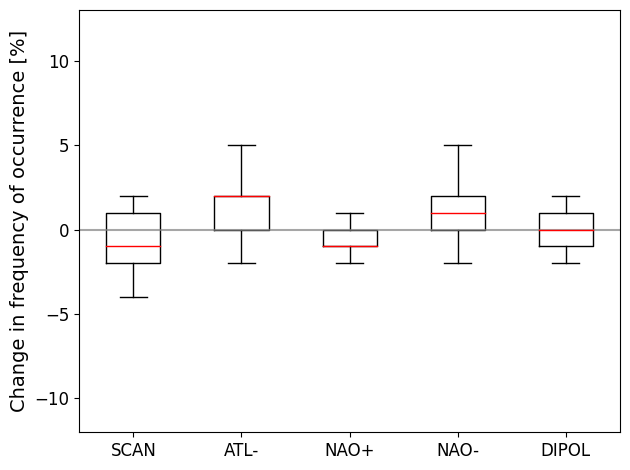

In [8]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl1['all'][:-1]), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl2['all'][:-1]), equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl3['all'][:-1]), equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl4['all'][:-1]), equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(np.zeros((len(models))),100*np.array(table_difference_cl5['all'][:-1]), equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
    
scenario="ssp5_"  
bp=plt.boxplot(x=[100*np.array(table_difference_cl1['all'][:-1]),100*np.array(table_difference_cl2['all'][:-1]),100*np.array(table_difference_cl3['all'][:-1]),100*np.array(table_difference_cl4['all'][:-1]),100*np.array(table_difference_cl5['all'][:-1])], labels=["SCAN","ATL-","NAO+","NAO-","DIPOL"], showfliers=False,medianprops=dict(color="r"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/whiskerplot_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

In [51]:
hist_scan=100*np.array(table_difference_cl1['all'][:-1])
hist_atl=100*np.array(table_difference_cl2['all'][:-1])
hist_naoplus=100*np.array(table_difference_cl3['all'][:-1])
hist_naominus=100*np.array(table_difference_cl4['all'][:-1])
hist_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [16]:
ssp5_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp5_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp5_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp5_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp5_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [13]:
ssp3_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp3_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp3_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp3_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp3_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [11]:
ssp2_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp2_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp2_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp2_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp2_dipol=100*np.array(table_difference_cl5['all'][:-1])

In [24]:
ssp1_scan=100*np.array(table_difference_cl1['all'][:-1])
ssp1_atl=100*np.array(table_difference_cl2['all'][:-1])
ssp1_naoplus=100*np.array(table_difference_cl3['all'][:-1])
ssp1_naominus=100*np.array(table_difference_cl4['all'][:-1])
ssp1_dipol=100*np.array(table_difference_cl5['all'][:-1])

[3, 4]


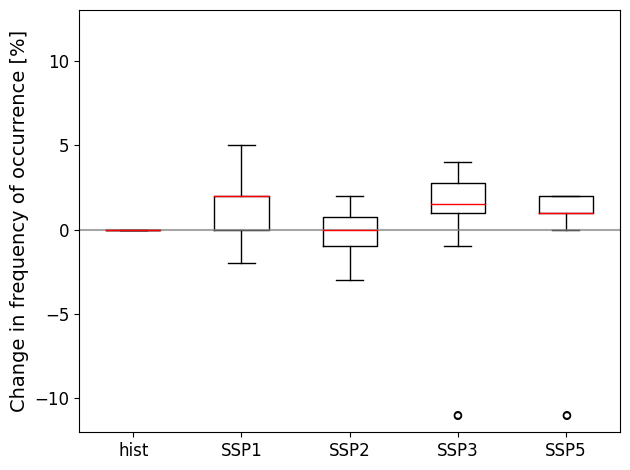

In [22]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(np.zeros((len(models))),np.zeros(len(models)), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(np.zeros((len(models))),ssp1_atl, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(np.zeros((len(models))),ssp2_atl, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(np.zeros((len(models))),ssp3_atl, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(np.zeros((len(models))),ssp5_atl, equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
    
scenario="Vergleich_neue_methode_"  
bp=plt.boxplot(x=[np.zeros(len(models)),ssp1_atl,ssp2_atl,ssp3_atl,ssp5_atl], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/atl_neueMethide_"+scenario+seas+"_"+region+".png",dpi=300)

array([[2.070e+03, 5.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       [2.070e+03, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00],
       [2.070e+03, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [2.099e+03, 1.000e+01, 2.900e+01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.099e+03, 1.000e+01, 3.000e+01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.099e+03, 1.000e+01, 3.100e+01, 0.000e+00, 0.000e+00, 0.000e+00]])

# PAZIFIK

In [15]:
ssp1_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp1_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp1_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp1_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp1_cl5=100*np.array(table_difference_cl5['all'][:-1])

In [17]:
ssp2_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp2_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp2_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp2_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp2_cl5=100*np.array(table_difference_cl5['all'][:-1])

In [19]:
ssp3_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp3_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp3_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp3_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp3_cl5=100*np.array(table_difference_cl5['all'][:-1])

In [21]:
ssp5_cl1=100*np.array(table_difference_cl1['all'][:-1])
ssp5_cl2=100*np.array(table_difference_cl2['all'][:-1])
ssp5_cl3=100*np.array(table_difference_cl3['all'][:-1])
ssp5_cl4=100*np.array(table_difference_cl4['all'][:-1])
ssp5_cl5=100*np.array(table_difference_cl5['all'][:-1])

[1, 2, 3]


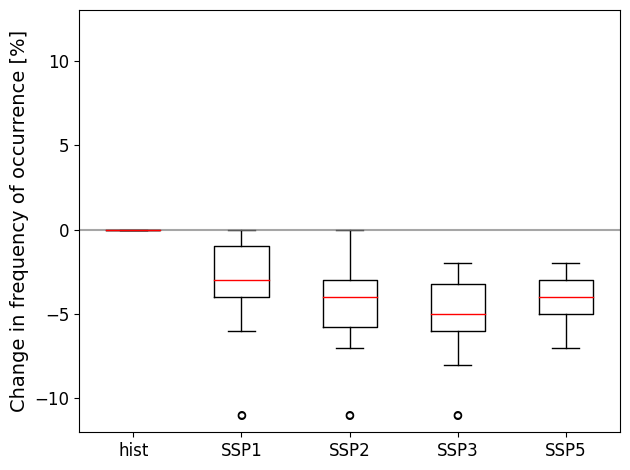

In [22]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(np.zeros((len(models))),np.zeros((len(models))), equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(np.zeros((len(models))),ssp1_cl5, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(np.zeros((len(models))),ssp2_cl5, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(np.zeros((len(models))),ssp3_cl5, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(np.zeros((len(models))),ssp5_cl5, equal_var=False)
values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)

scenario="Vergleich"  
bp=plt.boxplot(x=[np.zeros((len(models))),ssp1_cl5,ssp2_cl5,ssp3_cl5,ssp5_cl5], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="r"))
plt.ylabel('Change in frequency of occurrence [%]',fontsize=14)
#plt.xlabel(fontsize=12)
#plt.title("Whisker plot of multi-model distribution of ACR frequencies of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(0,0,6,color='grey', alpha=0.7)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,5.5)
plt.ylim(-12,13)
try:
    plt.text(smaller_indices[0]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, -11.5, "°", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, -11.5, "°", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/cl5polarres_"+scenario+seas+"_"+region+"_"+aufgabe+".png",dpi=300)

In [ ]:
#auslesen eines files



In [6]:
aufgabe="projected"
seas="mjjaso"
months=6
cluster = 5
months_name=[5,6,7,8,9,10]
month_len=[31,30,31,31,30,31]
months_official=["May","June","July","August","September","October"]
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
years_hist="1985-2014"
years_proj="1985-2014"
years_fut="2070-2099"
area="90_270"
region="atl"
if region=="paz":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
else:
    scan={}
    atl={}
    naoplus={}
    naominus={}
    dipol={}

counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}
models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
#models=["MULTIMODEL-hist"]
durchschnitt=np.zeros((6,18))
for model in range(len(models)):
    path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
    path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
    if models[model] == "ERA5":
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_5tabcluster_10tabPC_dates"
    else:
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates"
    occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')
    counts_hist['all']=np.bincount(np.round(occurence_hist['all'][:,3]).astype(int))/(days_per_period)

    print(model)
    for month in range(0,months):
        occurence_hist[str(months_official[month])]=np.array([])
        occurence_fut[str(months_official[month])]=np.array([])
        for entry in range(len(occurence_hist['all'])):
            if occurence_hist['all'][entry,1]==months_name[month]:
                occurence_hist[str(months_official[month])]=np.append(occurence_hist[str(months_official[month])],(occurence_hist['all'][entry,:]))
        occurence_hist[str(months_official[month])]= np.reshape(occurence_hist[str(months_official[month])], (int(len(occurence_hist[str(months_official[month])])/6),6))
        #print(occurence_hist['May'])
        #print(occurence_fut['May'])
        counts_hist[str(months_official[month])]=np.bincount(np.round(occurence_hist[str(months_official[month])][:,3]).astype(int))/(years*month_len[month])
    print(counts_hist['all'])
    durchschnitt[:,model]=counts_hist['all']
durschnitt=np.sum(durchschnitt,axis=1)/18
print(durchschnitt)
#print(np.sum(durschnitt))
if area=="90_270":
         freq_bias_proj_pac = np.array(durschnitt[1:])*100
else:
         freq_bias_proj_atl = np.array(durschnitt[1:])*100
    

0
[0.         0.2240942  0.23297101 0.19112319 0.16884058 0.18297101]
1
[0.         0.23768116 0.21775362 0.18206522 0.18333333 0.17916667]
2
[0.         0.22463768 0.19710145 0.18623188 0.20072464 0.19130435]
3
[0.         0.22663043 0.19601449 0.17173913 0.20289855 0.20271739]
4
[0.         0.21394928 0.20597826 0.17663043 0.20706522 0.19637681]
5
[0.         0.23568841 0.20163043 0.17807971 0.19456522 0.19003623]
6
[0.         0.22173913 0.21847826 0.18496377 0.18333333 0.19148551]
7
[0.         0.21702899 0.21177536 0.1875     0.19094203 0.19275362]
8
[0.02173913 0.21286232 0.21684783 0.19365942 0.16648551 0.1884058 ]
9
[0.         0.22952899 0.21612319 0.16884058 0.20108696 0.18442029]
10
[0.         0.2432971  0.20724638 0.15923913 0.20307971 0.18713768]
11
[0.         0.23641304 0.19692029 0.16394928 0.20833333 0.19438406]
12
[0.         0.23134058 0.22862319 0.16702899 0.1951087  0.17789855]
13
[0.         0.22518116 0.20833333 0.18115942 0.19601449 0.18931159]
14
[0.         0

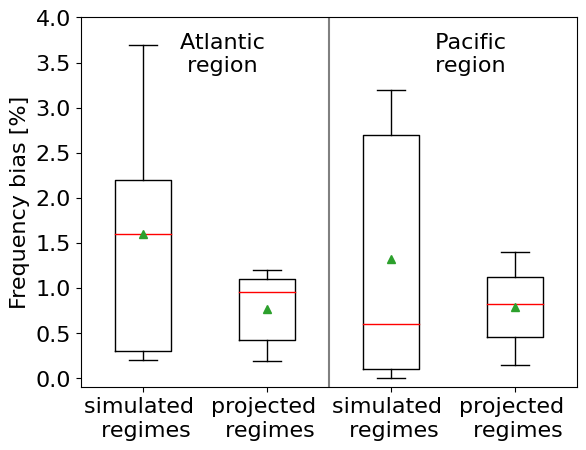

In [8]:
freq_bias_sim_pac = np.array([22.7, 21.9, 22.2, 16.2, 17.0])
ERA5_pac =          np.array([22.6, 21.9, 19.0, 18.9, 17.6])

freq_bias_sim_atl = np.array([23.2, 20.2, 18.2, 18.4, 20.0])
ERA5_atl =          np.array([22.9, 22.4, 19.8, 18.6, 16.3])
plt.ylabel("Frequency bias [%]",fontsize=16)
plt.vlines(2.5,-1,4,color='grey')
plt.text(1.3,3.4,"Atlantic \n region",fontsize=16)
plt.text(3.3,3.4," Pacific\n region ",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.1,4)
bp=plt.boxplot(x=[np.abs(freq_bias_sim_atl-ERA5_atl), np.abs(freq_bias_proj_atl-ERA5_atl), np.abs(freq_bias_sim_pac-ERA5_pac), np.abs(freq_bias_proj_pac-ERA5_pac)], labels=["simulated \n regimes", "projected \n regimes", "simulated \n regimes", "projected \n regimes"], showfliers=False,medianprops=dict(color="r"),showmeans=True)

plt.savefig(r"N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/freqbias.png",dpi=300)


In [21]:
freq_bias_proj_pac

array([22.45269726, 21.07588567, 17.87540258, 19.35084541, 19.00362319])

In [94]:
np.sum(np.abs(freq_bias_proj_pac-ERA5_pac))

3.9604830917874416